# Pie Chart in Matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Setting seaborn as default style even if use only matplotlib
sns.set()

## Example 1: Simple Pie Chart

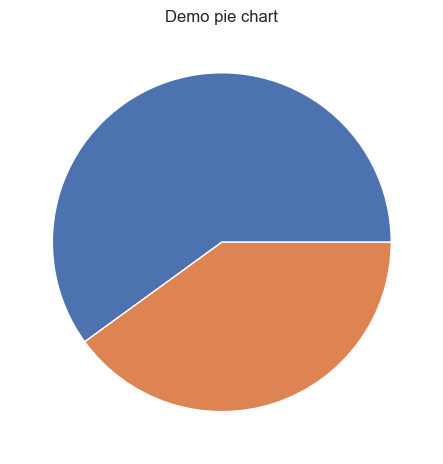

In [6]:
slices = [60,40]
plt.pie(slices)
plt.title('Demo pie chart')
plt.tight_layout()

# you can save the image here
#plt.savefig('pie1.png')
plt.show()

## Adding Labels
* To add labels, we've just assigned the strings we want to add as labels in a variable named labeling and passed it through the __plt.pie()__ function.

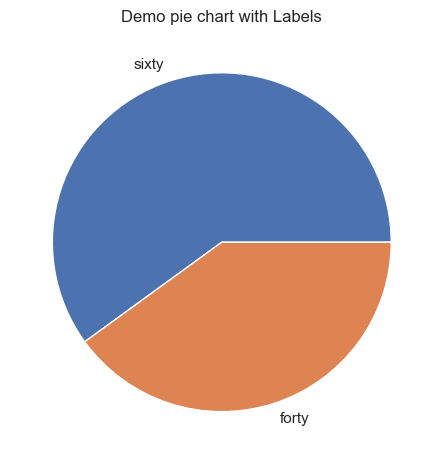

In [7]:
slices = [60,40]
labeling = ['sixty','forty']
plt.pie(slices,labels=labeling)
plt.title('Demo pie chart with Labels')
plt.tight_layout()
plt.show()

## Using Different Colors

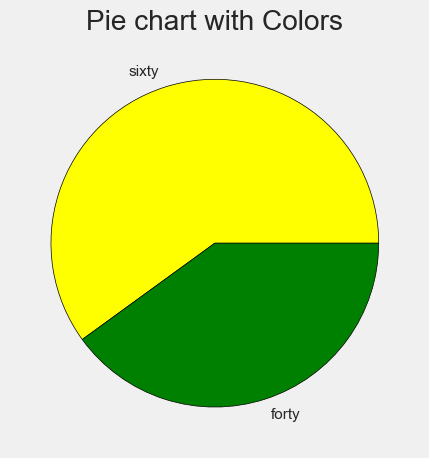

In [8]:
plt.style.use('fivethirtyeight')
slices = [60,40]
labeling = ['sixty','forty']
colorss = ['yellow','green']
plt.pie(slices,labels=labeling,colors=colorss,wedgeprops={'edgecolor':'black'})
plt.title('Pie chart with Colors')
plt.tight_layout()
plt.show()

## Providing Empasis
* we can also emphasize a particular slice in our pie chart by using the __explode__.

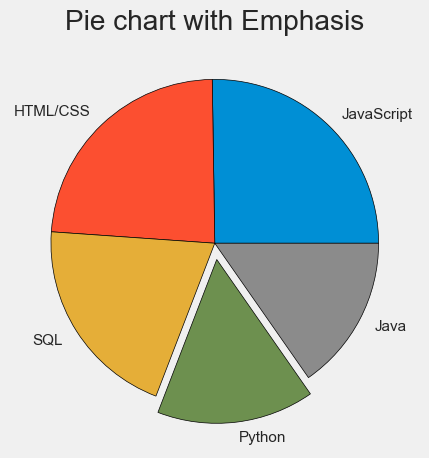

In [9]:
plt.style.use('fivethirtyeight')
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0,0,0,0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'})
plt.title('Pie chart with Emphasis')
plt.tight_layout()
plt.show()

## Chart Values
* Display percentages on the slices.
* We do this by passing a parameter __autopct='%1.1f%%'__ to the __plt.pie()__ function which will display percentage up-to one digit after the decimal point. 

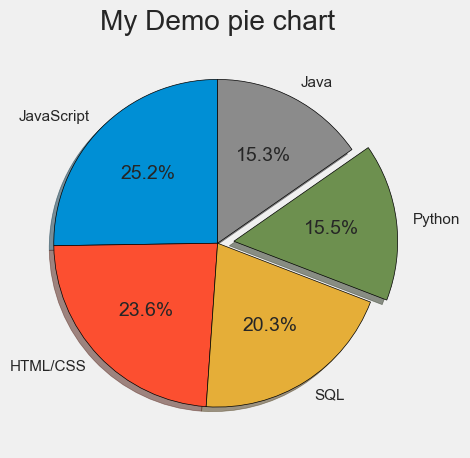

In [10]:
plt.style.use('fivethirtyeight')
slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0,0,0,0.1,0]
plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('My Demo pie chart')
plt.tight_layout()
plt.show()

## Example 2: Using Pandas DataFrames

### Datasets for Visualizations

In [14]:
# url 1
grouped_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_country_data.csv"
grouped_country_df = pd.read_csv(grouped_country_df_url)

# url 2
grouped_daily_country_df_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_country_df.csv"
grouped_daily_country_df = pd.read_csv(grouped_daily_country_df_url)

In [25]:
# preview the data
grouped_country_df['TotalAmount'] = grouped_country_df['TotalAmount'].astype('int64')
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521,57,15391.256667
1,Austria,11,10198,17,927.152727
2,Bahrain,2,548,2,274.200000
3,Belgium,25,41196,98,1647.853600
4,Brazil,1,1143,1,1143.600000


#### Data Aggregations for Visualizations

In [16]:
# get month on month total sales value
monthly_agg_df = grouped_daily_country_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
).reset_index()

# get month on month total sales value by Country
country_monthly_agg_df = grouped_daily_country_df.groupby(['MonthYear', 'Country']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum')
)

ValueError: could not convert string to float: 'Australia'

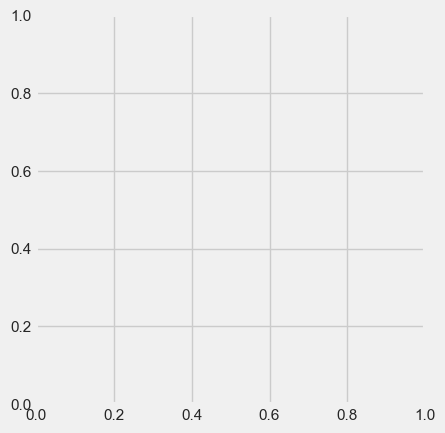

In [26]:
plt.pie(grouped_country_df.Country, grouped_country_df.TotalAmount)

In [18]:
grouped_country_df.dtypes

Country                    object
CountOfUniqueCustomers      int64
TotalAmount               float64
CountOfUniqueInvoices       int64
AverageSalesValue         float64
dtype: object

#### Filter the DataFame for Visualization

In [12]:
# Filter Only Countries with More than 5 Customers
filtered_df = grouped_country_df[grouped_country_df['CountOfUniqueCustomers'] >= 10]
filtered_df.shape

(11, 5)

In [13]:
df = filtered_df[['Country', 'TotalAmount', 'CountOfUniqueCustomers', 'AverageSalesValue', 'CountOfUniqueInvoices']]#.set_index('Country')